In [1]:
import pandas as pd
df = pd.read_csv("result/01_date_preprocessing_result.csv",sep=",")
df.head()

,Complaint_No,narrative,narrative_length,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking,Complaint_tokenized_text
0,0,purchase order day shipping amount receive pro...,1705,True,False,False,False,False,"[['purchase', 'order', 'day', 'shipping', 'amo..."
1,1,forwarded message date tue subject please inve...,904,True,False,False,False,False,"[['forwarded', 'message', 'date', 'tue', 'subj..."
2,2,forwarded message cc sent friday pdt subject f...,1230,False,False,False,False,True,"[['forwarded', 'message', 'cc', 'sent', 'frida..."
3,3,payment history missing credit report speciali...,903,False,True,False,False,False,"[['payment', 'history', 'missing', 'credit', '..."
4,4,payment history missing credit report made mis...,851,False,True,False,False,False,"[['payment', 'history', 'missing', 'credit', '..."


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162411 entries, 0 to 162410
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Complaint_No              162411 non-null  int64 
 1   narrative                 162411 non-null  object
 2   narrative_length          162411 non-null  int64 
 3   credit_card               162411 non-null  bool  
 4   credit_reporting          162411 non-null  bool  
 5   debt_collection           162411 non-null  bool  
 6   mortgages_and_loans       162411 non-null  bool  
 7   retail_banking            162411 non-null  bool  
 8   Complaint_tokenized_text  162411 non-null  object
dtypes: bool(5), int64(2), object(2)
memory usage: 5.7+ MB


In [3]:
X = df['narrative'].values
X

array(['purchase order day shipping amount receive product week sent followup email exact verbiage paid two day shipping received order company responded im sorry inform due unusually high order volume order shipped several week stock since early due high demand although continuing take order guaranteeing receive order place due time mask order exact shipping date right however guarantee ship soon soon delivers product u getting small shipment shipping first come first served basis appreciate patience fulfill order quickly recommend keeping order lose place line cancel distributor stock moment prefer cancel please note ask via email cancel accordance cancellation policy agreed checkout electronic inventory online requested order canceled refund issued canceled order sent verification order canceled refunded item particulate respirator refunded subtotal shipping tax total usd visa ending refund called disputed amount stated nothing needed submitted address issue recharged item removing 

In [4]:
import numpy as np

y = np.argmax(df[['credit_card', 'credit_reporting', 'debt_collection', 'mortgages_and_loans', 'retail_banking']].values, axis=1)
y.shape

(162411,)

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=22)

In [6]:
X_train.shape

(129928,)

In [7]:
y_train.shape

(129928,)

In [8]:
X_test.shape

(32483,)

In [9]:
y_test.shape

(32483,)

## Modeling

**using Multinomial Naive Bayes because we have multi labels**

### TF_IDF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

# Create a pipeline with a TF-IDF vectorizer and a Multinomial Naive Bayes classifier
model1 = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
model1.fit(X_train, y_train)

# Predict on the test set
y_pred = model1.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.58      0.67      3075
           1       0.80      0.96      0.87     18284
           2       0.85      0.45      0.59      4569
           3       0.80      0.79      0.79      3759
           4       0.90      0.71      0.79      2796

    accuracy                           0.81     32483
   macro avg       0.83      0.70      0.74     32483
weighted avg       0.82      0.81      0.80     32483



## Cross-validation

In [11]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model1, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.2f}")

Cross-Validation Scores: [0.81008528 0.79628717 0.80503048 0.81857644 0.80629272]
Mean Accuracy: 0.81


## BOW

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
# Create a pipeline with a CountVectorizer and a Multinomial Naive Bayes classifier
model2 = make_pipeline(CountVectorizer(), MultinomialNB())

# Train the model
model2.fit(X_train, y_train)

# Predict on the test set
y_pred = model2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.77      0.70      3075
           1       0.92      0.84      0.88     18284
           2       0.72      0.69      0.70      4569
           3       0.71      0.88      0.79      3759
           4       0.79      0.90      0.84      2796

    accuracy                           0.82     32483
   macro avg       0.76      0.82      0.78     32483
weighted avg       0.83      0.82      0.82     32483



## Cross-validation

In [13]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model2, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.2f}")

Cross-Validation Scores: [0.82135271 0.8099255  0.80355274 0.80995628 0.82005418]
Mean Accuracy: 0.81


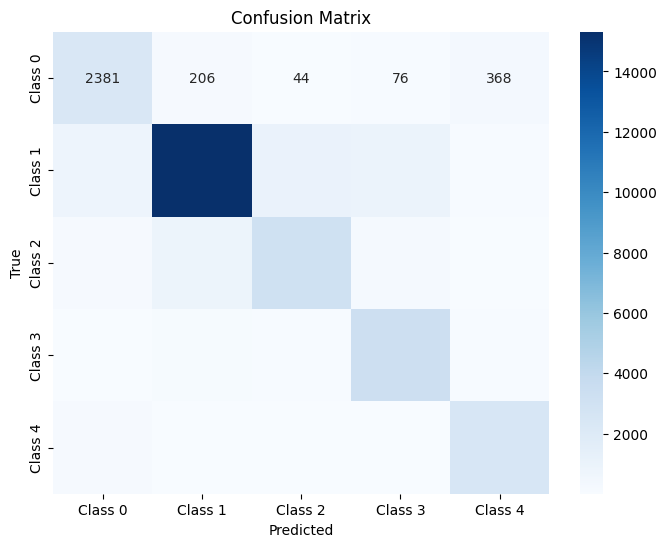

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Fine-tune

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'countvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'multinomialnb__alpha': uniform(0.1, 1.0),
}

model = make_pipeline(CountVectorizer(), MultinomialNB())

randomized_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
)

# Train the model with the best hyperparameters
randomized_search.fit(X_train, y_train)

# Get the best model from the randomized search
best_model = randomized_search.best_estimator_

# Predict on the test set
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {accuracy:.2f}")

# Print the best hyperparameters
print("Best Hyperparameters:", randomized_search.best_params_)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_best))


## Save our model

In [ ]:
import joblib
joblib.dump(best_model, 'best_model.pkl')

## Routing Mechanism:

In [ ]:
predicted_categories = best_model.predict(X)

class_mapping = {0: 'credit_card', 1: 'credit_reporting', 2: 'debt_collection', 3: 'mortgages_and_loans', 4: 'retail_banking'}

# Map numerical predictions to category names
predicted_categories = [class_mapping[pred] for pred in predicted_categories]

df['predicted_category'] = predicted_categories

df.head()

In [ ]:
# Function to route complaints based on predicted category
def route_complaint(complaint):
    if complaint['predicted_category'] == 'credit_card':
        return 'Credit Card Team'
    elif complaint['predicted_category'] == 'credit_reporting':
        return 'Credit Reporting Team'
    elif complaint['predicted_category'] == 'debt_collection':
        return 'Debt Collection Team'
    elif complaint['predicted_category'] == 'mortgages_and_loans':
        return 'Mortgages and Loans Team'
    elif complaint['predicted_category'] == 'retail_banking':
        return 'Retail Banking Team'
    else:
        return 'Other Team'

# Apply routing function to create a new 'resolved_team' column
df['resolved_team'] = df.apply(route_complaint, axis=1)

df.head()

## Final Dataframe

In [ ]:
final_df = df[['Complaint_No', 'narrative', 'resolved_team']]
final_df.head(10)

In [ ]:
# Save the DataFrame to a CSV file
final_df.to_csv('result/final_complaints_dataframe.csv', index=False)

### Error analysis

In [ ]:
# Identify misclassified samples
misclassified_samples = [(X_test[i], y_test[i], y_pred_best[i]) for i in range(len(y_test)) if y_test[i] != y_pred_best[i]]
len(misclassified_samples)

##Generating a Report

In [ ]:
from datetime import datetime

# Function to generate a report
def generate_report(df, accuracy_before_tuning, accuracy_after_tuning, misclassified_samples_before, misclassified_samples_after):
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    report_filename = f"complaints_report_{timestamp}.txt"

    with open(report_filename, 'w') as report_file:
        report_file.write("Complaints Resolution Report\n")
        report_file.write(f"Generated on: {timestamp}\n\n")

        # Add findings, insights, and recommendations
        report_file.write("Findings and Insights:\n")
        report_file.write(f" - Before hyperparameter tuning, the model accuracy was {accuracy_before_tuning:.2%}.\n")
        report_file.write(f" - After hyperparameter tuning, the model accuracy improved to {accuracy_after_tuning:.2%}.\n")
        report_file.write(f" - The error analysis showed {misclassified_samples_before} misclassified samples before tuning and {misclassified_samples_after} after tuning.\n")
        report_file.write(" - Recommendations: Use Bag of Words (BOW) with the best hyperparameters for optimal performance.\n\n")

    print(f"Report generated successfully: {report_filename}")
accuracy_before_tuning = 0.79
accuracy_after_tuning = 0.86
misclassified_samples_before = 1034
misclassified_samples_after = 712

generate_report(df, accuracy_before_tuning, accuracy_after_tuning, misclassified_samples_before, misclassified_samples_after)